# Predicting Titanic Survival

### Introduction
Here we will give the prediction of passenger survival in the Titanic accident based on the features. We will use the Decision tree and Support vector machine (SVM) classifier.

### Install the libraries

In [1]:

%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


### Load the data using the seaborn

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Correlation

### Select the features and target

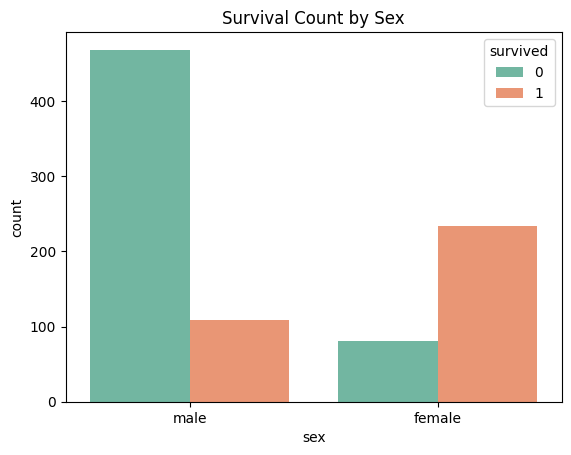

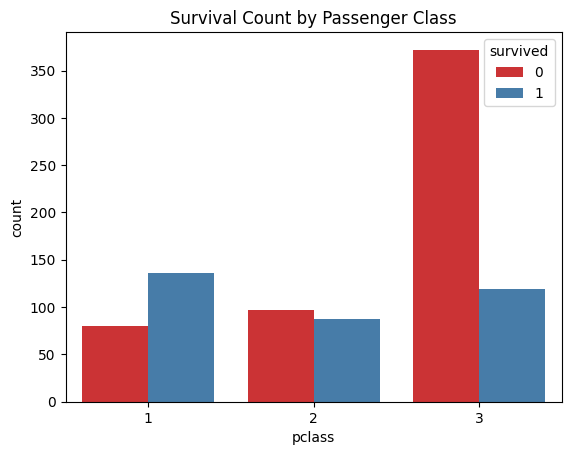

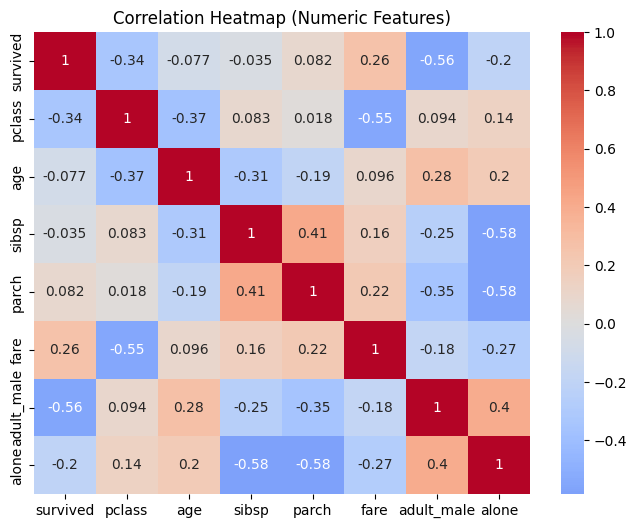

Correlation of features with survival:

survived      1.000000
fare          0.257307
parch         0.081629
sibsp        -0.035322
age          -0.077221
alone        -0.203367
pclass       -0.338481
adult_male   -0.557080
Name: survived, dtype: float64


In [28]:
sns.countplot(x="sex", hue="survived", data=titanic, palette="Set2")
plt.title("Survival Count by Sex")
plt.show()


sns.countplot(x="pclass", hue="survived", data=titanic, palette="Set1")
plt.title("Survival Count by Passenger Class")
plt.show()


corr = titanic.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

print("Correlation of features with survival:\n")
print(corr['survived'].sort_values(ascending=False))

In [29]:
# the target is "survived" column
y = titanic['survived']

# Create family_size 
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Define features (drop sibsp, parch, alone since family_size replaces them)
features = ['pclass', 'sex', 'age', 'fare', 'who', 'adult_male', 'family_size']

X = titanic[features]


### Split the dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)


### Preprocessing

In [31]:
# Separate features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


### Decision tree

classification report: 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



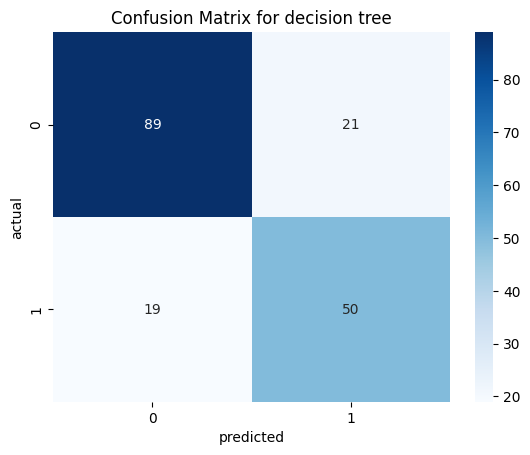

In [32]:
d_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

d_pipeline.fit(X_train, y_train)
y_pred = d_pipeline.predict(X_test)

print("classification report: ")
print(classification_report(y_test,y_pred))

cm_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for decision tree")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()


### SVM model

report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



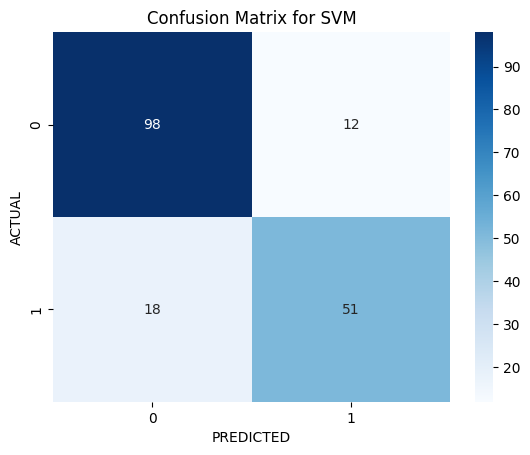

In [33]:
sv_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', SVC(kernel='linear', probability=True, random_state=42))
])
sv_pipeline.fit(X_train, y_train)
y_pred_s = sv_pipeline.predict(X_test)
print("report:")
print(classification_report(y_test, y_pred_s))
cm_s = confusion_matrix(y_test, y_pred_s)
sns.heatmap(cm_s, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=[0,1], yticklabels=[0,1]
            )
plt.title("Confusion Matrix for SVM")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.show()

### Conclusion
- Decision Tree achieved 0.78 accuracy on test data.
- SVM achieved 0.83 on test data.
